In [1]:
# Importing the libraries
import pandas as pd
import numpy as np
from mlxtend.frequent_patterns import apriori, association_rules
import matplotlib.pyplot as plt

In [2]:
!pip install mlxtend

In [3]:
#Import dataset from Local drive
from google.colab import files
uploaded = files.upload()

Saving vibhuti PIET18CS148 - Apriori2 dataset.csv to vibhuti PIET18CS148 - Apriori2 dataset.csv


In [6]:
dataset = pd.read_csv('vibhuti PIET18CS148 - Apriori2 dataset.csv', sep=',')
dataset.head()

0                    1               2  ...   30   31   32
0      citrus fruit  semi-finished bread       margarine  ...  NaN  NaN  NaN
1    tropical fruit               yogurt          coffee  ...  NaN  NaN  NaN
2        whole milk                  NaN             NaN  ...  NaN  NaN  NaN
3         pip fruit               yogurt    cream cheese  ...  NaN  NaN  NaN
4  other vegetables           whole milk  condensed milk  ...  NaN  NaN  NaN

[5 rows x 32 columns]

In [7]:
# Mounting Google Drive
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [8]:
print(dataset)

                        0                    1                 2  ...   30   31   32
0            citrus fruit  semi-finished bread         margarine  ...  NaN  NaN  NaN
1          tropical fruit               yogurt            coffee  ...  NaN  NaN  NaN
2              whole milk                  NaN               NaN  ...  NaN  NaN  NaN
3               pip fruit               yogurt      cream cheese  ...  NaN  NaN  NaN
4        other vegetables           whole milk    condensed milk  ...  NaN  NaN  NaN
...                   ...                  ...               ...  ...  ...  ...  ...
9830              sausage              chicken              beef  ...  NaN  NaN  NaN
9831    cooking chocolate                  NaN               NaN  ...  NaN  NaN  NaN
9832              chicken         citrus fruit  other vegetables  ...  NaN  NaN  NaN
9833  semi-finished bread        bottled water              soda  ...  NaN  NaN  NaN
9834              chicken       tropical fruit  other vegetables 

In [9]:
#Print Total number of Rows & columns in dataset
print(dataset.shape)

(9835, 32)


In [10]:
#Print Information about data
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9835 entries, 0 to 9834
Data columns (total 32 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   0       9835 non-null   object
 1   1       7676 non-null   object
 2   2       6033 non-null   object
 3   3       4734 non-null   object
 4   4       3729 non-null   object
 5   5       2874 non-null   object
 6   6       2229 non-null   object
 7   7       1684 non-null   object
 8   8       1246 non-null   object
 9   9       896 non-null    object
 10  11      650 non-null    object
 11  12      468 non-null    object
 12  13      351 non-null    object
 13  14      273 non-null    object
 14  15      196 non-null    object
 15  16      141 non-null    object
 16  17      95 non-null     object
 17  18      66 non-null     object
 18  19      52 non-null     object
 19  20      38 non-null     object
 20  21      29 non-null     object
 21  22      18 non-null     object
 22  23      14 non-null     

In [11]:
types = dataset.dtypes
print(types)

0     object
1     object
2     object
3     object
4     object
5     object
6     object
7     object
8     object
9     object
11    object
12    object
13    object
14    object
15    object
16    object
17    object
18    object
19    object
20    object
21    object
22    object
23    object
24    object
25    object
26    object
27    object
28    object
29    object
30    object
31    object
32    object
dtype: object


In [12]:
dataset.isnull().sum()

0        0
1     2159
2     3802
3     5101
4     6106
5     6961
6     7606
7     8151
8     8589
9     8939
11    9185
12    9367
13    9484
14    9562
15    9639
16    9694
17    9740
18    9769
19    9783
20    9797
21    9806
22    9817
23    9821
24    9827
25    9828
26    9828
27    9829
28    9830
29    9831
30    9834
31    9834
32    9834
dtype: int64

In [16]:
transactions = []
for i in range(0, 999):
    transactions.append([str(dataset.values[i,j]) for j in range(0, 19)])

transactions

[['citrus fruit',
  'semi-finished bread',
  'margarine',
  'ready soups',
  'nan',
  'nan',
  'nan',
  'nan',
  'nan',
  'nan',
  'nan',
  'nan',
  'nan',
  'nan',
  'nan',
  'nan',
  'nan',
  'nan',
  'nan'],
 ['tropical fruit',
  'yogurt',
  'coffee',
  'nan',
  'nan',
  'nan',
  'nan',
  'nan',
  'nan',
  'nan',
  'nan',
  'nan',
  'nan',
  'nan',
  'nan',
  'nan',
  'nan',
  'nan',
  'nan'],
 ['whole milk',
  'nan',
  'nan',
  'nan',
  'nan',
  'nan',
  'nan',
  'nan',
  'nan',
  'nan',
  'nan',
  'nan',
  'nan',
  'nan',
  'nan',
  'nan',
  'nan',
  'nan',
  'nan'],
 ['pip fruit',
  'yogurt',
  'cream cheese',
  'meat spreads',
  'nan',
  'nan',
  'nan',
  'nan',
  'nan',
  'nan',
  'nan',
  'nan',
  'nan',
  'nan',
  'nan',
  'nan',
  'nan',
  'nan',
  'nan'],
 ['other vegetables',
  'whole milk',
  'condensed milk',
  'long life bakery product',
  'nan',
  'nan',
  'nan',
  'nan',
  'nan',
  'nan',
  'nan',
  'nan',
  'nan',
  'nan',
  'nan',
  'nan',
  'nan',
  'nan',
  'nan']

In [17]:
import pandas as pd
from mlxtend.preprocessing import TransactionEncoder

te = TransactionEncoder()
te_ary = te.fit(transactions).transform(transactions)
df = pd.DataFrame(te_ary, columns=te.columns_)


In [18]:
print(df)

     Instant food products  UHT-milk  ...  yogurt  zwieback
0                    False     False  ...   False     False
1                    False     False  ...    True     False
2                    False     False  ...   False     False
3                    False     False  ...    True     False
4                    False     False  ...   False     False
..                     ...       ...  ...     ...       ...
994                  False     False  ...   False     False
995                  False     False  ...   False     False
996                  False     False  ...    True     False
997                  False     False  ...   False     False
998                  False     False  ...   False     False

[999 rows x 157 columns]


In [19]:
df.pop('nan')

0       True
1       True
2       True
3       True
4       True
       ...  
994     True
995     True
996    False
997     True
998     True
Name: nan, Length: 999, dtype: bool

In [20]:
df

Instant food products  UHT-milk  ...  yogurt  zwieback
0                    False     False  ...   False     False
1                    False     False  ...    True     False
2                    False     False  ...   False     False
3                    False     False  ...    True     False
4                    False     False  ...   False     False
..                     ...       ...  ...     ...       ...
994                  False     False  ...   False     False
995                  False     False  ...   False     False
996                  False     False  ...    True     False
997                  False     False  ...   False     False
998                  False     False  ...   False     False

[999 rows x 156 columns]

In [21]:
freq_items = apriori(df, min_support=0.05, use_colnames=True)
freq_items

support                        itemsets
0   0.069069                          (beef)
1   0.075075                  (bottled beer)
2   0.132132                 (bottled water)
3   0.050050                   (brown bread)
4   0.076076                   (canned beer)
5   0.095095                  (citrus fruit)
6   0.076076                        (coffee)
7   0.075075                          (curd)
8   0.053053                 (domestic eggs)
9   0.073073                   (frankfurter)
10  0.066066         (fruit/vegetable juice)
11  0.055055                     (margarine)
12  0.089089                    (newspapers)
13  0.185185              (other vegetables)
14  0.078078                        (pastry)
15  0.052052                          (pork)
16  0.222222                    (rolls/buns)
17  0.110110               (root vegetables)
18  0.078078                       (sausage)
19  0.078078                 (shopping bags)
20  0.159159                          (soda)
21  0.096096                (tropical fruit)
22  0.074074            (whipped/sour cream)
23  0.269269                    (whole milk)
24  0.126126                        (yogurt)
25  0.072072  (other vegetables, whole milk)
26  0.068068        (rolls/buns, whole milk)
27  0.056056            (yogurt, whole milk)

In [22]:
rules = association_rules(freq_items, metric="confidence", min_threshold=0.1)
rules

antecedents         consequents  ...  leverage  conviction
0  (other vegetables)        (whole milk)  ...  0.022207    1.196329
1        (whole milk)  (other vegetables)  ...  0.022207    1.112615
2        (rolls/buns)        (whole milk)  ...  0.008230    1.053391
3        (whole milk)        (rolls/buns)  ...  0.008230    1.040907
4            (yogurt)        (whole milk)  ...  0.022094    1.315315
5        (whole milk)            (yogurt)  ...  0.022094    1.103625

[6 rows x 9 columns]

In [23]:
print(len(rules))

6


In [24]:
freq_items['length'] = freq_items['itemsets'].apply(lambda x: len(x))
freq_items

support                        itemsets  length
0   0.069069                          (beef)       1
1   0.075075                  (bottled beer)       1
2   0.132132                 (bottled water)       1
3   0.050050                   (brown bread)       1
4   0.076076                   (canned beer)       1
5   0.095095                  (citrus fruit)       1
6   0.076076                        (coffee)       1
7   0.075075                          (curd)       1
8   0.053053                 (domestic eggs)       1
9   0.073073                   (frankfurter)       1
10  0.066066         (fruit/vegetable juice)       1
11  0.055055                     (margarine)       1
12  0.089089                    (newspapers)       1
13  0.185185              (other vegetables)       1
14  0.078078                        (pastry)       1
15  0.052052                          (pork)       1
16  0.222222                    (rolls/buns)       1
17  0.110110               (root vegetables)       1
18  0.078078                       (sausage)       1
19  0.078078                 (shopping bags)       1
20  0.159159                          (soda)       1
21  0.096096                (tropical fruit)       1
22  0.074074            (whipped/sour cream)       1
23  0.269269                    (whole milk)       1
24  0.126126                        (yogurt)       1
25  0.072072  (other vegetables, whole milk)       2
26  0.068068        (rolls/buns, whole milk)       2
27  0.056056            (yogurt, whole milk)       2

In [25]:
freq_items[ (freq_items['length'] == 2) &
                   (freq_items['support'] >= 0.05) ]

support                        itemsets  length
25  0.072072  (other vegetables, whole milk)       2
26  0.068068        (rolls/buns, whole milk)       2
27  0.056056            (yogurt, whole milk)       2

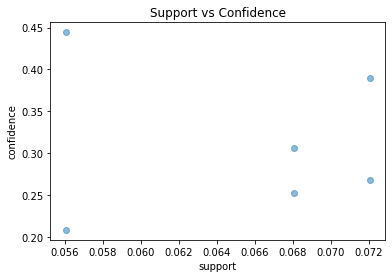

In [26]:
plt.scatter(rules['support'], rules['confidence'], alpha=0.5)
plt.xlabel('support')
plt.ylabel('confidence')
plt.title('Support vs Confidence')
plt.show()

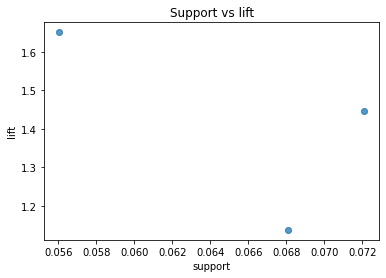

In [27]:
plt.scatter(rules['support'], rules['lift'], alpha=0.5)
plt.xlabel('support')
plt.ylabel('lift')
plt.title('Support vs lift')
plt.show()

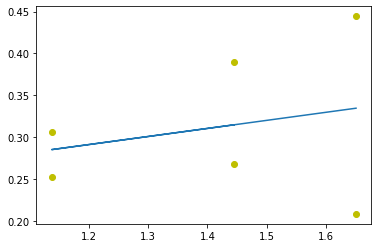

In [28]:
fit = np.polyfit(rules['lift'], rules['confidence'], 1)
fit_fn = np.poly1d(fit)
plt.plot(rules['lift'], rules['confidence'], 'yo', rules['lift'], 
 fit_fn(rules['lift']))

In [29]:
!pip install apyori

  Created wheel for apyori: filename=apyori-1.1.2-cp37-none-any.whl size=5975 sha256=3fe8ed500cb38abd4cd2985f7718395a174dbc0bff954e3493bbf62610e122f7
  Stored in directory: /root/.cache/pip/wheels/5d/92/bb/474bbadbc8c0062b9eb168f69982a0443263f8ab1711a8cad0
Successfully built apyori


In [30]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [31]:
dataset = pd.read_csv('vibhuti PIET18CS148 - Apriori2 dataset.csv', sep=',', header = None )
dataset.head()

0                    1             2   ...   29   30   31
0               0                    1             2  ...   30   31   32
1    citrus fruit  semi-finished bread     margarine  ...  NaN  NaN  NaN
2  tropical fruit               yogurt        coffee  ...  NaN  NaN  NaN
3      whole milk                  NaN           NaN  ...  NaN  NaN  NaN
4       pip fruit               yogurt  cream cheese  ...  NaN  NaN  NaN

[5 rows x 32 columns]

In [32]:
print(dataset)

                       0                    1                 2   ...   29   30   31
0                       0                    1                 2  ...   30   31   32
1            citrus fruit  semi-finished bread         margarine  ...  NaN  NaN  NaN
2          tropical fruit               yogurt            coffee  ...  NaN  NaN  NaN
3              whole milk                  NaN               NaN  ...  NaN  NaN  NaN
4               pip fruit               yogurt      cream cheese  ...  NaN  NaN  NaN
...                   ...                  ...               ...  ...  ...  ...  ...
9831              sausage              chicken              beef  ...  NaN  NaN  NaN
9832    cooking chocolate                  NaN               NaN  ...  NaN  NaN  NaN
9833              chicken         citrus fruit  other vegetables  ...  NaN  NaN  NaN
9834  semi-finished bread        bottled water              soda  ...  NaN  NaN  NaN
9835              chicken       tropical fruit  other vegetables 

In [33]:
transactions = []
for i in range(0, 999):
    transactions.append([str(dataset.values[i,j]) for j in range(0, 19)])

transactions

[['0',
  '1',
  '2',
  '3',
  '4',
  '5',
  '6',
  '7',
  '8',
  '9',
  '11',
  '12',
  '13',
  '14',
  '15',
  '16',
  '17',
  '18',
  '19'],
 ['citrus fruit',
  'semi-finished bread',
  'margarine',
  'ready soups',
  'nan',
  'nan',
  'nan',
  'nan',
  'nan',
  'nan',
  'nan',
  'nan',
  'nan',
  'nan',
  'nan',
  'nan',
  'nan',
  'nan',
  'nan'],
 ['tropical fruit',
  'yogurt',
  'coffee',
  'nan',
  'nan',
  'nan',
  'nan',
  'nan',
  'nan',
  'nan',
  'nan',
  'nan',
  'nan',
  'nan',
  'nan',
  'nan',
  'nan',
  'nan',
  'nan'],
 ['whole milk',
  'nan',
  'nan',
  'nan',
  'nan',
  'nan',
  'nan',
  'nan',
  'nan',
  'nan',
  'nan',
  'nan',
  'nan',
  'nan',
  'nan',
  'nan',
  'nan',
  'nan',
  'nan'],
 ['pip fruit',
  'yogurt',
  'cream cheese',
  'meat spreads',
  'nan',
  'nan',
  'nan',
  'nan',
  'nan',
  'nan',
  'nan',
  'nan',
  'nan',
  'nan',
  'nan',
  'nan',
  'nan',
  'nan',
  'nan'],
 ['other vegetables',
  'whole milk',
  'condensed milk',
  'long life bakery p

In [34]:
# Training Apriori on the dataset
from apyori import apriori
rules = apriori(transactions, min_support = 0.003, min_confidence = 0.2, min_lift = 3, min_length = 2)

In [35]:
# Visualising the results
results = list(rules)
print(results)

[RelationRecord(items=frozenset({'hamburger meat', 'Instant food products'}), support=0.003003003003003003, ordered_statistics=[OrderedStatistic(items_base=frozenset({'Instant food products'}), items_add=frozenset({'hamburger meat'}), confidence=0.3333333333333333, lift=9.0)]), RelationRecord(items=frozenset({'Instant food products', 'root vegetables'}), support=0.003003003003003003, ordered_statistics=[OrderedStatistic(items_base=frozenset({'Instant food products'}), items_add=frozenset({'root vegetables'}), confidence=0.3333333333333333, lift=3.027272727272727)]), RelationRecord(items=frozenset({'berries', 'abrasive cleaner'}), support=0.003003003003003003, ordered_statistics=[OrderedStatistic(items_base=frozenset({'abrasive cleaner'}), items_add=frozenset({'berries'}), confidence=0.375, lift=7.970744680851063)]), RelationRecord(items=frozenset({'chicken', 'abrasive cleaner'}), support=0.003003003003003003, ordered_statistics=[OrderedStatistic(items_base=frozenset({'abrasive cleaner'

In [36]:
for  rule in results:
  for Rlationrecors in rule:
    print(Rlationrecors)

Streaming output truncated to the last 5000 lines.
0.003003003003003003
[OrderedStatistic(items_base=frozenset({'frozen vegetables', 'bottled beer'}), items_add=frozenset({'nan', 'yogurt'}), confidence=0.375, lift=3.0706967213114753), OrderedStatistic(items_base=frozenset({'yogurt', 'bottled beer'}), items_add=frozenset({'nan', 'frozen vegetables'}), confidence=0.3333333333333333, lift=7.4), OrderedStatistic(items_base=frozenset({'yogurt', 'frozen vegetables'}), items_add=frozenset({'nan', 'bottled beer'}), confidence=0.3, lift=3.996), OrderedStatistic(items_base=frozenset({'nan', 'yogurt', 'bottled beer'}), items_add=frozenset({'frozen vegetables'}), confidence=0.3333333333333333, lift=7.2391304347826075), OrderedStatistic(items_base=frozenset({'nan', 'frozen vegetables', 'yogurt'}), items_add=frozenset({'bottled beer'}), confidence=0.3333333333333333, lift=4.4399999999999995)]
frozenset({'nan', 'other vegetables', 'fruit/vegetable juice', 'bottled beer'})
0.004004004004004004
[Ordere

In [37]:
%%writefile app.py
import streamlit as st 
from PIL import Image
import pickle
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from mlxtend.frequent_patterns import apriori, association_rules
st.set_option('deprecation.showfileUploaderEncoding', False)
def find_associatio_rule(support):
  # Load the pickled model
  model = pickle.load(open('/content/drive/My Drive/apriorivibhuti.pkl','rb'))     
  if uploaded_file is not None:
    dataset= pd.read_csv(uploaded_file)
  else:
    dataset= pd.read_csv('/content/drive/My Drive/vibhuti PIET18CS148 - Apriori2 dataset.csv')

  #Create list 
  transactions = []
  for i in range(0, 999):
    transactions.append([str(dataset.values[i,j]) for j in range(0, 20)])

  from mlxtend.preprocessing import TransactionEncoder
  te = TransactionEncoder()
  te_ary = te.fit(transactions).transform(transactions)
  df = pd.DataFrame(te_ary, columns=te.columns_)
  df.pop('nan')
  freq_items = apriori(df, min_support=support, use_colnames=True)
  rules = association_rules(freq_items, metric="confidence", min_threshold=0.2)
  return rules
def find_frequent_items(support):
  # Load the pickled model
  model = pickle.load(open('/content/drive/My Drive/apriori.pkl','rb'))     
  if uploaded_file is not None:
    dataset= pd.read_csv(uploaded_file)
  else:
    dataset= pd.read_csv('/content/drive/My Drive/vibhuti PIET18CS148 - Apriori2 dataset.csv')
  #Create list 
  transactions = []
  for i in range(0, 7500):
    transactions.append([str(dataset.values[i,j]) for j in range(0, 20)])

  from mlxtend.preprocessing import TransactionEncoder
  te = TransactionEncoder()
  te_ary = te.fit(transactions).transform(transactions)
  df = pd.DataFrame(te_ary, columns=te.columns_)
  df.pop('nan')
  freq_items = apriori(df, min_support=support, use_colnames=True)
  rules = association_rules(freq_items, metric="confidence", min_threshold=0.2)
  
  return freq_items
html_temp = """
   <div class="" style="background-color:red;" >
   <div class="clearfix">           
   <div class="col-md-12">
   <center><p style="font-size:40px;color:white;margin-top:10px;">Poornima Institute of Engineering & Technology</p></center> 
   <center><p style="font-size:30px;color:white;margin-top:10px;">Department of Computer Engineering</p></center> 
   <center><p style="font-size:25px;color:white;margin-top:10px;"Machine Learning Lab Experiment</p></center> 
   </div>
   </div>
   </div>
   """
st.markdown(html_temp,unsafe_allow_html=True)
st.header("Identification of items Purchased together ")
  
uploaded_file = st.file_uploader("Upload dataset", help='Please upload vibhuti PIET18CS148 - Apriori2 dataset.csvotherwise leave blank') 
support = st.number_input('Insert a minimum suppport to find association rule ',0.0,1.0)

  
if st.button("Association Rule"):
  rules=find_associatio_rule(support)
  st.success('Apriori has found Following rules {}'.format(rules))
if st.button("Frequent Items"):
  frequent_items=find_frequent_items(support)
  st.success('Apriori has found Frequent itemsets {}'.format(frequent_items))      
if st.button("About"):
  st.subheader("Developed by Rishav bansal")
  st.subheader("Department of Computer Engineering")
html_temp = """
   <div class="" style="background-color:yellow;" >
   <div class="clearfix">           
   <div class="col-md-12">
   <center><p style="font-size:20px;color:white;margin-top:10px;">Machine learning Experiment No. 9</p></center> 
   </div>
   </div>
   </div>
   """
st.markdown(html_temp,unsafe_allow_html=True)

Writing app.py
